# Part-1: K-means Algorithm - step-by-step implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generate 2D data points

# num_clusters: total number of clusters to be present in the data points
# num_points: number of data points per cluster to be generated

def generate_data(num_clusters, num_points):
  np.random.seed(42)
  data = []
  for i in range(num_clusters):
    center = np.random.randn(2) * 5
    for j in range(num_points):
      point = center + np.random.randn(2)
      data.append(point)
  return np.array(data)


In [3]:
data = generate_data(3, 10)
# data.shape

c = data[0,:]
print(c)
print(c.shape)

[3.1312593  0.83170835]
(2,)


In [4]:
print(c[:, np.newaxis])
print(c[:, np.newaxis].shape)


[[3.1312593 ]
 [0.83170835]]
(2, 1)


In [5]:
# Randomly select datapoints to initialize the cluster centroids

def initialize_centroids(data, num_clusters):
   np.random.seed(42)
   indices = np.random.choice(len(data), num_clusters, replace=False)
   return data[indices]

In [6]:
# Assign each data point to the nearest centroid
def assign_to_nearest(data, centroids):
  distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
  return np.argmin(distances, axis=0)


In [7]:
# Update the centroids by taking the mean of all the data points assigned t a cluster
def update_centroids (data, labels, num_clusters):
  centroids = np.zeros((num_clusters, 2))
  for i in range(num_clusters):
    centroids[i] = np.mean(data[labels==i], axis=0)
  return centroids


In [8]:
# Runs the K-means algorithm on the given data
def k_means(data, num_clusters, num_iterations=10):
  centroids = initialize_centroids(data, num_clusters)
  for i in range(num_iterations):
    labels = assign_to_nearest(data, centroids)
    centroids = update_centroids(data, labels, num_clusters)
  return labels, centroids  


## Generate Data

In [9]:
data = generate_data(3, 50)
data.shape

(150, 2)

In [10]:
labels, centroids = k_means(data, 3)

In [11]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
centroids

array([[-1.74504698, -3.81457411],
       [ 2.30965344, -0.76898653],
       [-6.76271553, -4.69846434]])

## Plot the Data Points and the Cluster Centroids

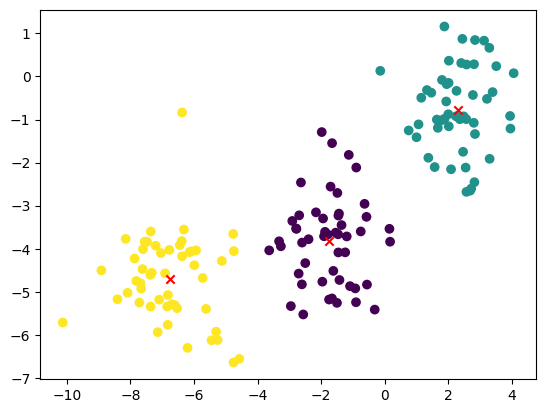

In [13]:
# Plot the data points
plt.scatter(data[:,0], data[:,1], c=labels)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

# Part-2: K-means with Scikitlearn

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Generate Synthetic Data

In [15]:
# Generate random data 
X, y = make_blobs(n_samples=200, centers=3, random_state=42)
X.shape

(200, 2)

## Apply K-means Algorithm

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

print(kmeans.labels_)


[0 2 1 1 1 1 2 1 0 1 0 0 0 0 0 1 2 1 0 1 0 0 1 2 1 2 2 1 2 0 0 0 1 1 2 2 1
 2 1 2 0 2 1 0 1 0 0 1 0 2 1 2 1 2 2 2 1 0 2 0 1 2 1 1 1 1 2 2 1 2 2 1 2 0
 2 0 0 2 0 2 2 0 0 1 1 1 1 2 0 1 0 2 2 2 0 1 2 0 0 2 1 1 2 1 2 0 1 0 0 1 0
 0 2 1 2 1 1 2 2 2 1 0 2 1 1 0 2 2 0 2 0 1 2 1 1 0 0 0 2 0 2 2 1 0 0 2 0 1
 1 0 2 1 0 1 0 1 1 2 0 0 2 0 0 1 2 0 0 2 1 0 1 2 0 1 2 0 2 2 2 0 2 0 1 1 1
 2 0 0 0 2 2 0 1 1 2 1 2 2 0 0]


## Cluster Centroids

In [17]:
kmeans.cluster_centers_

array([[ 4.63218228,  2.10121377],
       [-6.74539381, -6.85144337],
       [-2.65882129,  8.95756821]])

## Plot data points and the cluster centroids

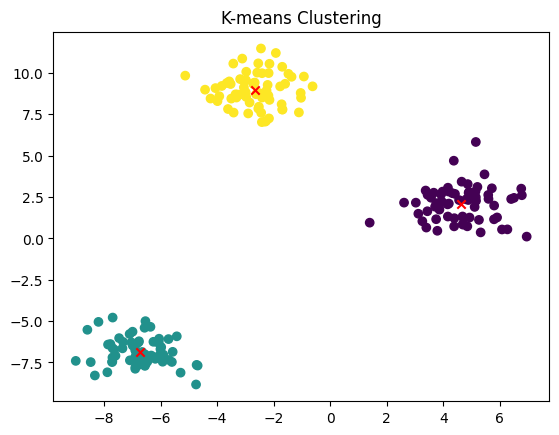

In [18]:
# Plot the data points
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
 
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.show()

## Effect of different initializations on K-means Algorithm

## Generate Synthetic Data

In [19]:

np.random.seed(0)

X = np.vstack((np.random.randn(100, 2) + [2, 2], np.random.randn(100, 2) + [2, -2]))
X.shape

(200, 2)

## Plot the Data Points

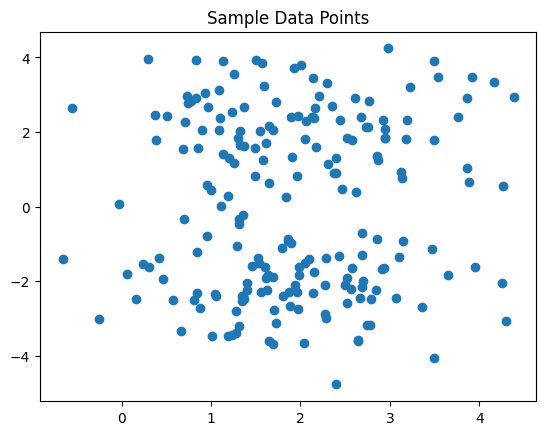

In [20]:
plt.scatter(X[:,0], X[:, 1])
plt.title('Sample Data Points')
plt.show()

## Find Clusters

In [45]:
n_clusters = 3

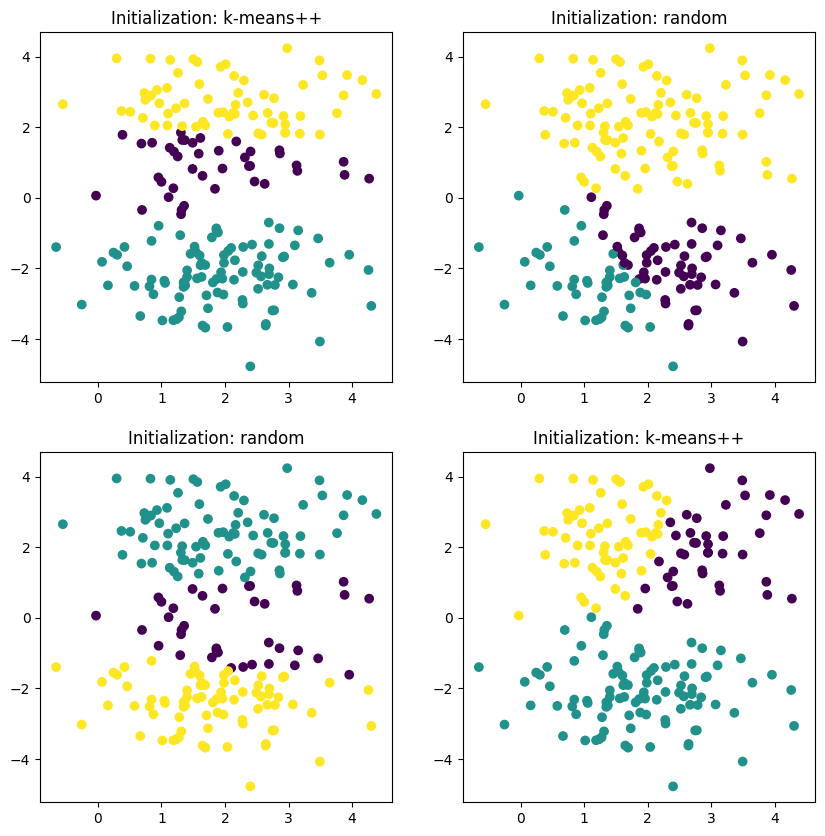

In [46]:

# Performing K-means clustering with different initializations

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
  for j in range(2):
    if i == j:
      kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, max_iter=10)
    else:
      kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=10)

    y_pred = kmeans.fit_predict(X)

    axs[i, j].scatter(X[:, 0], X[:, 1], c=y_pred)
    axs[i, j].set_title('Initialization: {}'.format(kmeans.init))

plt.show()

In [32]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.98375741,  2.12695531],
       [ 1.8710798 , -2.13979478]])

## Set the Centroid Explicitly

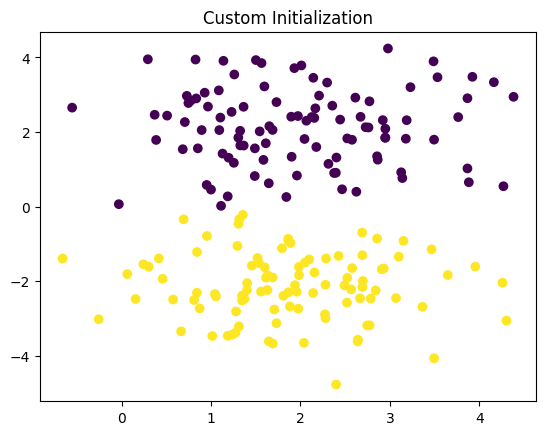

In [36]:

kmeans = KMeans(n_clusters=n_clusters, init=centroids, n_init=1)

y_pred = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Custom Initialization')

plt.show()


## Elbow PLot - Find the Optimal Value of K (number of clusters)

In [42]:

# Collect all the values of WCSS for different initialization of KMeans with different values of K

wcss = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


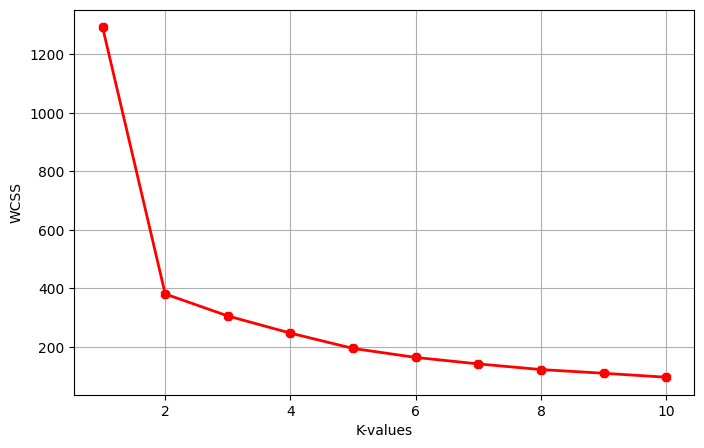

In [44]:
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker="8")
plt.xlabel('K-values')
plt.ylabel('WCSS')
plt.show()

# Part-3: Color Image Segmentation with K-means Algorithm

In [47]:
import cv2

In [49]:
# Load the image.
img = cv2.imread('Lena.tiff')
img.shape

(512, 512, 3)

In [51]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [52]:
type(img)

numpy.ndarray

In [53]:
img.dtype

dtype('uint8')

In [55]:
print(img[0,0,0]) # first row, first column and red channel
print(img[0,0,1]) # first row, forst column and the green channel
print(img[0,0,2]) # first row, forst column and the blue channel


226
137
125


In [56]:

print(img[0,1,0]) # first row, second column and red channel
print(img[0,1,1]) # first row, second column and the green channel
print(img[0,1,2]) # first row, second column and the blue channel


226
137
125



## Reshape the 3D image array into a 2D array

In [57]:
pixel_values = img.reshape((-1, 3))
pixel_values.shape

(262144, 3)

In [58]:
512*512

262144

In [59]:
pixel_values

array([[226, 137, 125],
       [226, 137, 125],
       [223, 137, 133],
       ...,
       [179,  70,  79],
       [181,  71,  81],
       [185,  74,  81]], dtype=uint8)

## Apply K-means Clustering on the Pixels

In [60]:
# number of clusters
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixel_values)

KMeans(n_clusters=4)

In [62]:
labels = kmeans.predict(pixel_values)
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [63]:
kmeans.cluster_centers_

array([[101.25343178,  28.84590037,  69.0382738 ],
       [212.30634324, 123.17559487, 115.1115666 ],
       [173.02833508,  74.53114274,  88.96691129],
       [228.61633535, 186.04550895, 164.34008118]])

In [64]:
# Replace each pixel with the mean color of its assigned cluster.
new_pixel_values = kmeans.cluster_centers_[labels]
segmented_img = new_pixel_values.reshape(img.shape)

## Convert to usigned int

In [65]:
segmented_img = segmented_img.astype('uint8')
segmented_img.shape

(512, 512, 3)

In [72]:
np.unique(segmented_img[:,:,0]) # Red channel
#np.unique(segmented_img[:,:,1]) # Green channel
#np.unique(segmented_img[:,:,2]) # Blue channel


array([101, 173, 212, 228], dtype=uint8)

## Display the Results

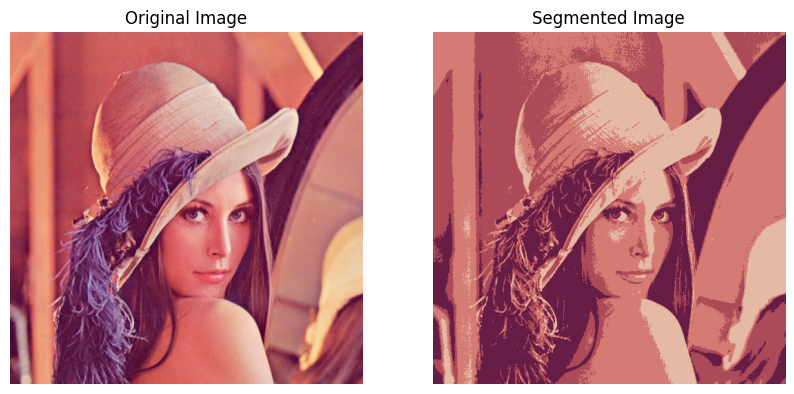

In [67]:
# Display the original image
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the segmented image
ax[1].imshow(segmented_img)
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

## PLot the Histogram

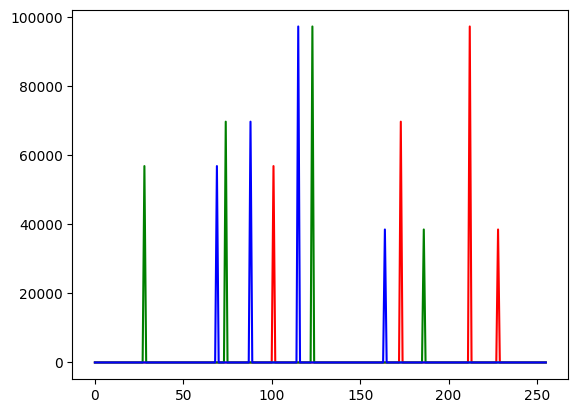

In [71]:
hist_R = cv2.calcHist([segmented_img], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([segmented_img], [1], None, [256], [0, 256])
hist_B = cv2.calcHist([segmented_img], [2], None, [256], [0, 256])

# Plot the channel histograms
plt.plot(hist_R, c='red')
plt.plot(hist_G, c='green')
plt.plot(hist_B, c='blue')
plt.show()